In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow import keras

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv('Titanic.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [6]:
df.shape

(891, 12)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

In [10]:
categorical_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [11]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [12]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,NaN,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int32  
 4   Sex          891 non-null    int32  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int32  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int32  
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(5), int64(5)
memory usage: 66.3 KB


In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int32  
 4   Sex          891 non-null    int32  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int32  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int32  
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(5), int64(5)
memory usage: 66.3 KB


In [16]:
# Заполняем пропущенные значения в столбце Age медианой
df['Age'] = df['Age'].fillna(df['Age'].median())


In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int32  
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int32  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int32  
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(5), int64(5)
memory usage: 66.3 KB


In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [20]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [21]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [22]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,3,413,0,28.0,1,2,675,23.4500,147,2
889,890,1,81,1,26.0,0,0,8,30.0000,60,0


In [23]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Modeling

In [24]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.035077,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,-0.254888,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,0.684121,0.157112
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.048252,-0.017230,-0.049105,0.047348,-0.049173,0.061959,-0.004557
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,0.096681,0.104057
Age,0.034212,-0.064910,-0.339898,0.048252,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,-0.240839,-0.014205
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,0.043593,0.066654
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,-0.028324,0.038322
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.006041
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.221226


In [25]:
import numpy as np
np.var(df['Sex'])

0.22821808306282676

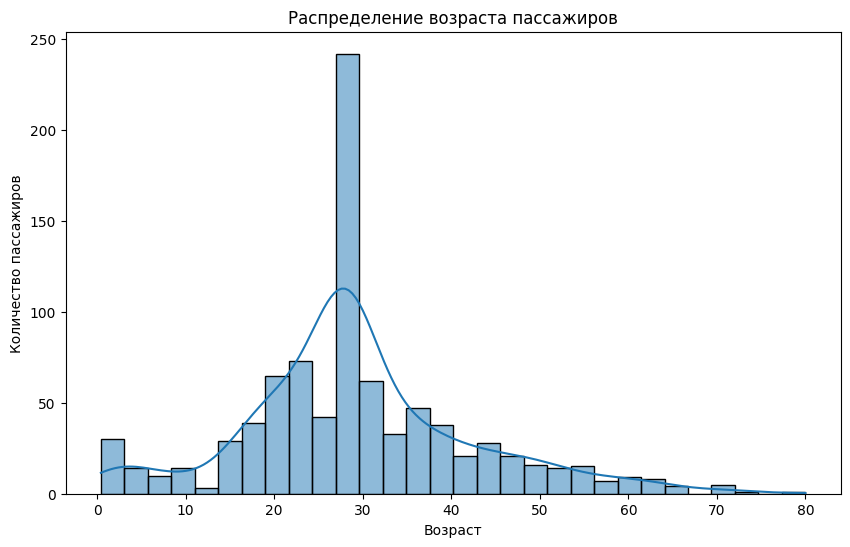

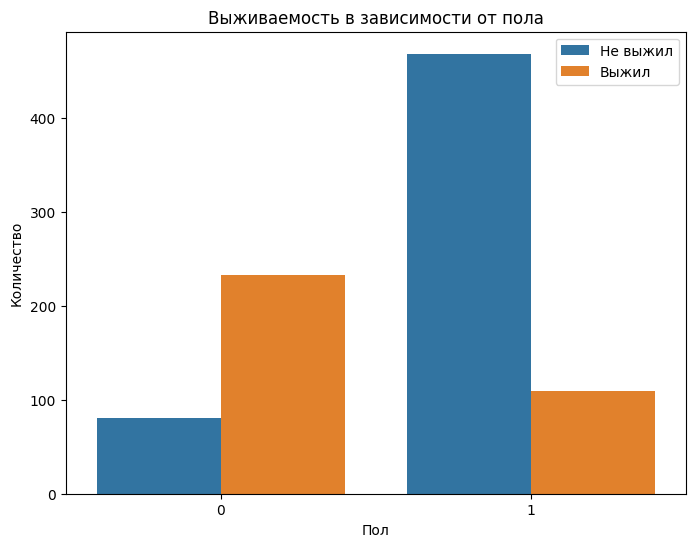

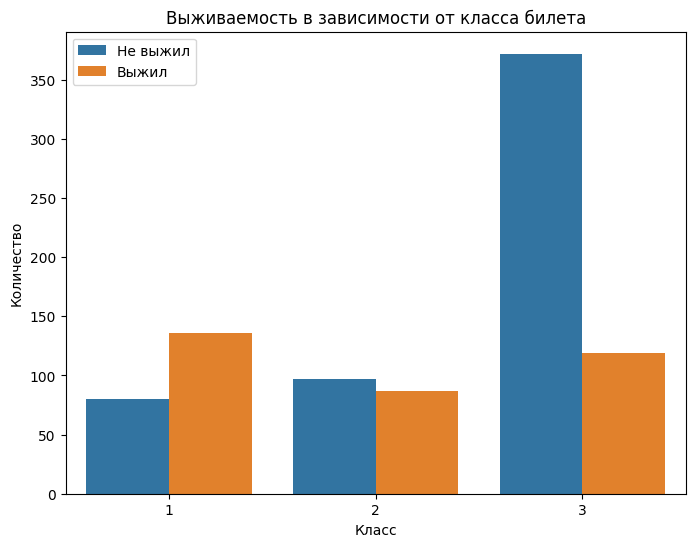

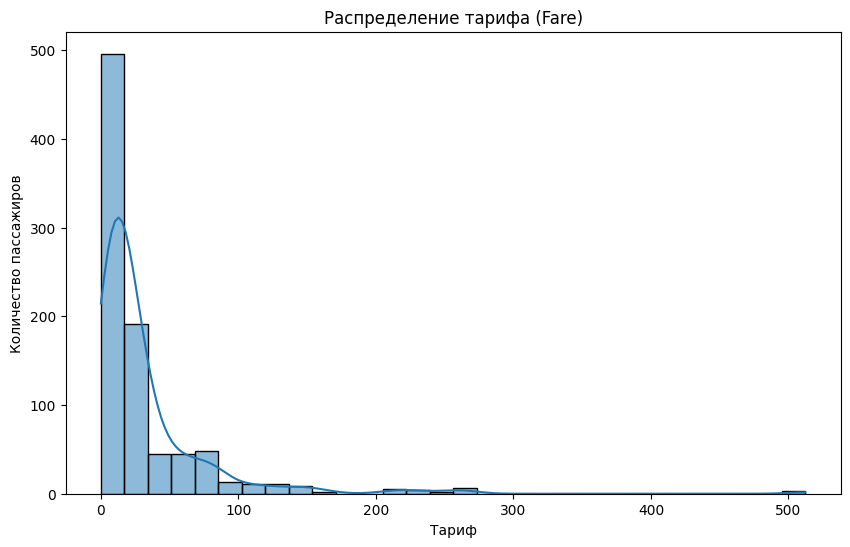

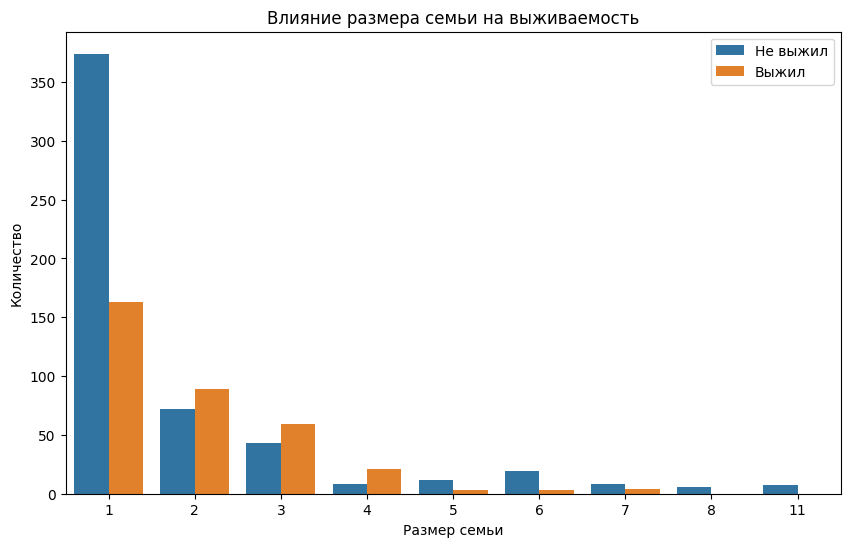

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Распределение возраста пассажиров
plt.figure(figsize=(10, 6))  # Создание области для графика с размером 10x6 дюймов
sns.histplot(df['Age'].dropna(), kde=True, bins=30)  # Гистограмма распределения возраста с плотностью (kde)
plt.title('Распределение возраста пассажиров')  # Заголовок графика
plt.xlabel('Возраст')  # Название оси X
plt.ylabel('Количество пассажиров')  # Название оси Y
plt.show()  # Отображение графика

# 2. Выживаемость в зависимости от пола
plt.figure(figsize=(8, 6))  # Создание области для графика с размером 8x6 дюймов
sns.countplot(x='Sex', hue='Survived', data=df)  # Столбчатая диаграмма количества пассажиров по полу, сгруппированная по выжившим
plt.title('Выживаемость в зависимости от пола')  # Заголовок графика
plt.xlabel('Пол')  # Название оси X
plt.ylabel('Количество')  # Название оси Y
plt.legend(['Не выжил', 'Выжил'])  # Легенда для выживших и невыживших
plt.show()  # Отображение графика

# 3. Выживаемость в зависимости от класса билета
plt.figure(figsize=(8, 6))  # Создание области для графика с размером 8x6 дюймов
sns.countplot(x='Pclass', hue='Survived', data=df)  # Столбчатая диаграмма выживаемости по классу билета
plt.title('Выживаемость в зависимости от класса билета')  # Заголовок графика
plt.xlabel('Класс')  # Название оси X
plt.ylabel('Количество')  # Название оси Y
plt.legend(['Не выжил', 'Выжил'])  # Легенда для выживших и невыживших
plt.show()  # Отображение графика

# 4. Распределение тарифа (Fare)
plt.figure(figsize=(10, 6))  # Создание области для графика с размером 10x6 дюймов
sns.histplot(df['Fare'], kde=True, bins=30)  # Гистограмма распределения тарифа с плотностью (kde)
plt.title('Распределение тарифа (Fare)')  # Заголовок графика
plt.xlabel('Тариф')  # Название оси X
plt.ylabel('Количество пассажиров')  # Название оси Y
plt.show()  # Отображение графика

# 5. (Закомментированная часть для корреляции, не используется в данном варианте)

# 6. Влияние количества членов семьи на выживаемость
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Создание нового признака "FamilySize" (количество членов семьи, включая пассажира)
plt.figure(figsize=(10, 6))  # Создание области для графика с размером 10x6 дюймов
sns.countplot(x='FamilySize', hue='Survived', data=df)  # Столбчатая диаграмма влияния размера семьи на выживаемость
plt.title('Влияние размера семьи на выживаемость')  # Заголовок графика
plt.xlabel('Размер семьи')  # Название оси X
plt.ylabel('Количество')  # Название оси Y
plt.legend(['Не выжил', 'Выжил'])  # Легенда для выживших и невыживших
plt.show()  # Отображение графика


A100 - 2m

In [27]:
#feature_importances


Epoch 1/30


c:\Users\Capybara-PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5251 - loss: 0.7062 - val_accuracy: 0.7188 - val_loss: 0.6268
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6414 - loss: 0.6371 - val_accuracy: 0.7688 - val_loss: 0.5645
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7194 - loss: 0.5799 - val_accuracy: 0.8188 - val_loss: 0.4955
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7511 - loss: 0.4985 - val_accuracy: 0.8375 - val_loss: 0.4249
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7819 - loss: 0.4598 - val_accuracy: 0.8438 - val_loss: 0.3786
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8135 - loss: 0.3991 - val_accuracy: 0.8438 - val_loss: 0.3470
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8050 - loss: 0.3994 - val_accuracy: 0.8562 - val_loss: 0.3239
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8519 - loss: 0.3332 - val_accuracy: 0.8625 - val_loss: 0.3104
Epo

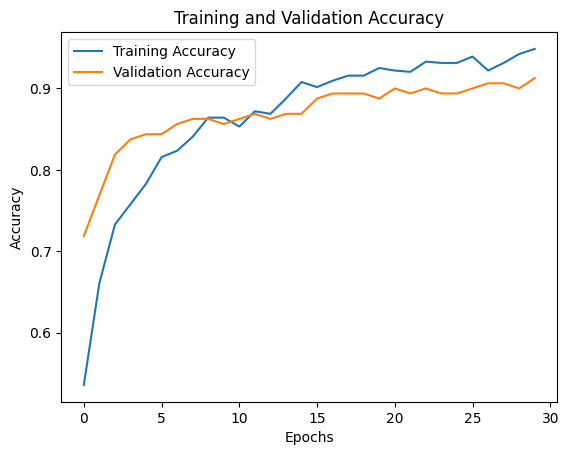

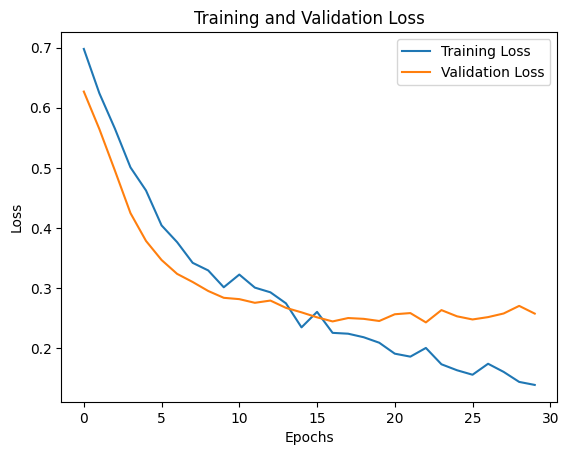

In [35]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# 1. Создание синтетического набора данных для бинарной классификации
# Используем функцию make_classification для создания случайного датасета с 1000 примерами и 20 признаками
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_classes=2, random_state=42)

# 2. Разделение на тренировочные и тестовые данные
# Разделяем данные на тренировочную (80%) и тестовую (20%) выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Стандартизация данных (приведение признаков к единому масштабу)
# Стандартизация улучшает обучение модели, особенно для нейронных сетей
scaler = StandardScaler()  # Инициализируем стандартный скейлер
X_train = scaler.fit_transform(X_train)  # Применяем стандартизацию к тренировочным данным
X_test = scaler.transform(X_test)  # Применяем ту же трансформацию к тестовым данным

# 4. Создание нейронной сети с усложненной архитектурой
# Sequential - это последовательная модель, где слои добавляются по очереди
model = Sequential()

# Добавляем первый полносвязный слой с 64 нейронами и активацией ReLU
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Dropout слой для регуляризации (вероятность отключения нейронов 0.3)
model.add(Dropout(0.3))

# Добавляем второй полносвязный слой с 32 нейронами
model.add(Dense(32, activation='relu'))

# Еще один Dropout слой с вероятностью 0.3
model.add(Dropout(0.3))

# Третий полносвязный слой с 16 нейронами
model.add(Dense(16, activation='relu'))

# Выходной слой с одним нейроном и сигмоидальной функцией активации для бинарной классификации
model.add(Dense(1, activation='sigmoid'))

# 5. Компиляция модели
# Используем оптимизатор Adam (один из самых эффективных для нейронных сетей), 
# функцию потерь 'binary_crossentropy' для бинарной классификации и метрику 'accuracy'
model.compile(optimizer=Adam(learning_rate=0.001),  # Уменьшили learning_rate для более плавного обучения
              loss='binary_crossentropy',  # Функция потерь для бинарной классификации
              metrics=['accuracy'])  # Отслеживаем точность (accuracy)

# 6. Обучение модели
# Мы тренируем модель на тренировочных данных, используя эпохи (количество повторений обучения)
history = model.fit(X_train, y_train,  # Входные данные и метки для обучения
                    epochs=30,  # Увеличили количество эпох для лучшего обучения
                    batch_size=32,  # Размер пакета (число примеров, используемых за один шаг обновления градиента)
                    validation_split=0.2,  # 20% от тренировочных данных используем для валидации
                    verbose=1)  # Отображение хода обучения

# 7. Оценка модели на тестовых данных
# После обучения оцениваем точность и потерю на тестовой выборке
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# 8. Визуализация процесса обучения (график точности и ошибки)
import matplotlib.pyplot as plt

# График точности
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# График потерь
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


.pkl .h5 .gguf

In [36]:
import joblib
joblib.dump(model, 'fully-connected-model.pkl')


['fully-connected-model.pkl']

In [37]:
model_loaded = joblib.load('fully-connected-model.pkl')

In [38]:
model_loaded.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([[1.49767911e-02],
       [8.14235464e-05],
       [6.04813993e-01],
       [1.93734452e-01],
       [9.94332552e-01],
       [6.34570360e-01],
       [9.99468625e-01],
       [2.40105204e-04],
       [9.76684034e-01],
       [5.77504039e-01],
       [3.61217000e-02],
       [5.11988550e-02],
       [9.99416947e-01],
       [9.94338810e-01],
       [2.77426955e-03],
       [1.99536313e-04],
       [9.94296789e-01],
       [9.03490186e-03],
       [9.97176588e-01],
       [7.60898471e-01],
       [9.29802433e-02],
       [9.87141669e-01],
       [3.51134390e-02],
       [9.98495162e-01],
       [4.70126927e-01],
       [9.77581382e-01],
       [7.12701321e-01],
       [2.10097921e-03],
       [9.86711621e-01],
       [4.84772073e-03],
       [2.38818064e-01],
       [1.32682515e-04],
       [1.10754557e-02],
       [8.67217958e-01],
       [9.99901116e-01],
       [4.49136719e-02],
       [9.65636492e-01],
       [8.17070063e-03],
       [9.59463239e-01],
       [9.29526806e-01],


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9382 - loss: 0.1609 - val_accuracy: 0.9187 - val_loss: 0.2497
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9353 - loss: 0.1574 - val_accuracy: 0.9187 - val_loss: 0.2466
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9531 - loss: 0.1268 - val_accuracy: 0.9125 - val_loss: 0.2589
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9555 - loss: 0.1109 - val_accuracy: 0.9187 - val_loss: 0.2445
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9481 - loss: 0.1389 - val_accuracy: 0.9187 - val_loss: 0.2520
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9600 - loss: 0.1187 - val_accuracy: 0.9187 - val_loss: 0.2495
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9654 - loss: 0.1118 - val_accuracy: 0.9187 - val_loss: 0.2564
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9741 - loss: 0.0903 - val_accuracy: 0.9187 - val_loss:

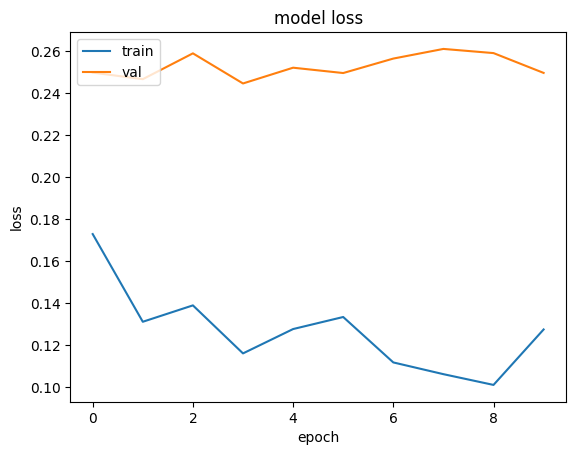

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Пример хорошего графика

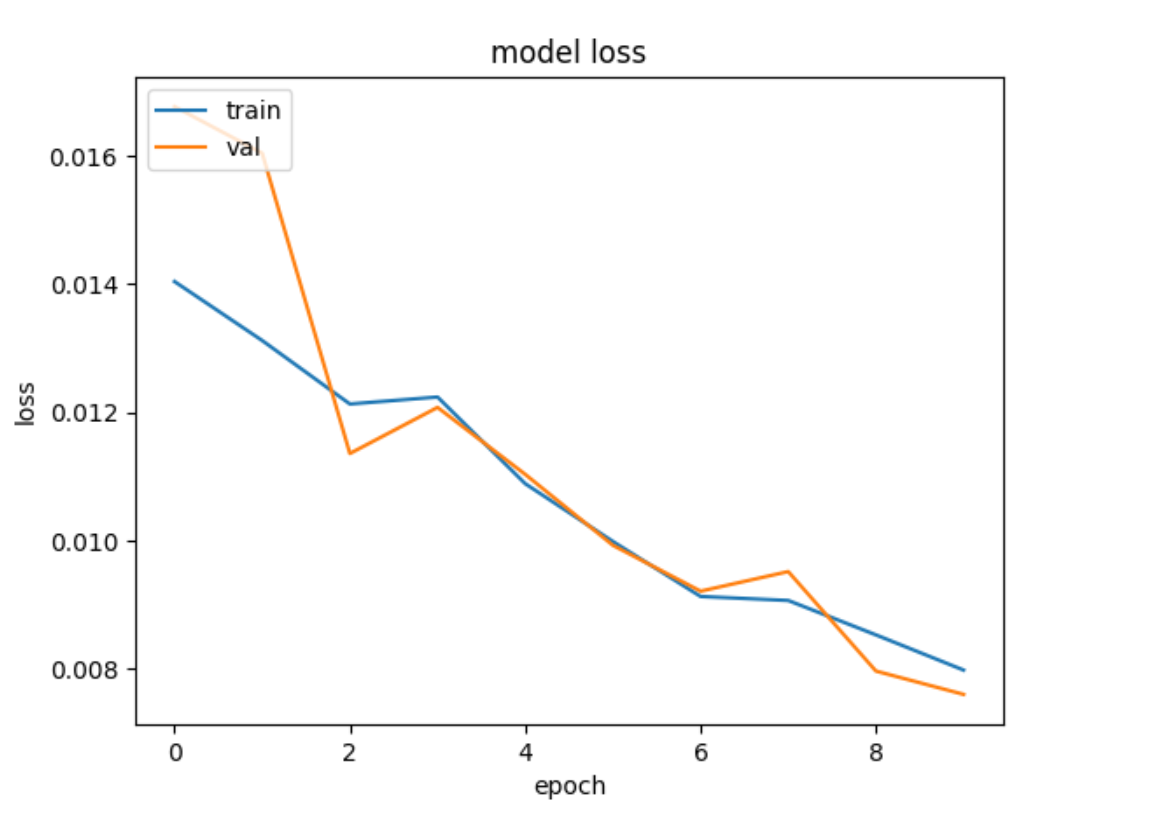

In [41]:
df = pd.read_csv('Titanic.csv')

In [42]:
df.shape

(891, 12)

In [43]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [44]:
df['Survived'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>

In [45]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [46]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
# Find Outliers in DataFrame

import pandas as pd
import numpy as np

# Sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5, 100],
    'B': [10, 12, 14, 13, 15, 200],
    'C': [5, 6, 7, 8, 9, 300]
}

df = pd.DataFrame(data)

# Function to find outliers
def find_outliers(df):
    outliers = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Get outliers
outliers = find_outliers(df)
print(outliers)

{'A':      A    B    C
5  100  200  300, 'B':      A    B    C
5  100  200  300, 'C':      A    B    C
5  100  200  300}
